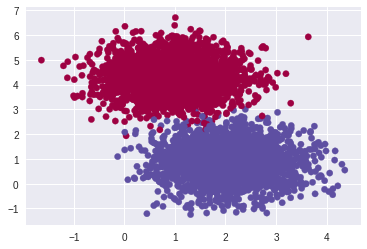

In [26]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# DATA FOR CLASSIFICATION
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, cluster_std=0.7,random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

reshaped_y = np.array(y).reshape(len(y),1)

enc = OneHotEncoder()
enc.fit(reshaped_y)
encoded_y = enc.transform(reshaped_y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.33, random_state=42)
# --------------------------

In [29]:
# MAIN
minibatch_size = 32
n_experiment = 2

# Create placeholder to accumulate prediction accuracy
accs = np.zeros(n_experiment)

for k in range(n_experiment):
    # Reset model
    model = make_network()

    # Train the model
    model = sgd(model, X_train, y_train, minibatch_size)

    y_pred = np.zeros_like(y_test)

    for i, x in enumerate(X_test):
        # Predict the distribution of label
        _, prob = forward(x, model)
        # Get label by picking the most probable one
        y = np.argmax(prob)
        y_pred[i] = y

    # Compare the predictions with the true labels and take the percentage
    accs[k] = (y_pred == y_test).sum() / y_test.size

print('Mean accuracy: {}, std: {}'.format(accs.mean(), accs.std()))
# --------------------------


# NETWORK
n_feature = 2
n_class = 2
n_iter = 1000

def make_network():
    # Initialize weights with Standard Normal random variables
    model = dict(
        W_1 = np.random.rand(2,2),
        W_2 = np.random.rand(2,2),
        W_out = np.random.rand(2,2),
        W_ResNet = np.random.rand(2,2),
        
        b_1 = np.random.rand(2),
        b_2 = np.random.rand(2),
        b_out = np.random.rand(2),
        b_ResNet = np.random.rand(2)
    )

    return model


def forward(x, model):
    a_1 = np.add(model['W_1'].dot(x), model['b_1'])
    z_1 = np.tanh(a_1)
    a_2 = np.add(model['W_2'].dot(z_1), model['b_2'])
    z_2 = ReLU(a_2)
    a_out_1 = np.add(model['W_out'].dot(z_2), model['b_out'])
    a_out_2 = np.add(model['W_ResNet'].dot(x), model['b_ResNet'])
    a_out = np.add(a_out_1, a_out_2)
    
    hidden_states = dict(a_1=a_1, z_1=z_1, a_2=a_2, z_2=z_2, a_out_1=a_out_1, a_out_2=a_out_2, a_out=a_out)
    z_out = softmax(a_out)
    
    return hidden_states, z_out


    # FUNCTIONS FOR FORWARD PASS
def ReLU(x):
    y = []
    for scalar in x:
        y.append(scalar * (scalar > 0))
    return np.array(y)


def softmax(x):
    e_x = np.exp(x - np.max(x))
    out = e_x / e_x.sum()
    return out
    # --------------------------

    
def sgd(model, X_train, y_train, minibatch_size):
    for iter in range(n_iter):
        print('Iteration {}'.format(iter))
        
        for i in range(0, X_train.shape[0], minibatch_size):
            # Get pair of (X, y) of the current minibatch/chunk
            X_train_mini = X_train[i:i + minibatch_size]
            y_train_mini = y_train[i:i + minibatch_size]

            model = sgd_step(model, X_train_mini, y_train_mini)

    return model


def sgd_step(model, X_train, y_train):
    grad = get_minibatch_grad(model, X_train, y_train)
    model = model.copy()

    # Update every parameters in our networks (W1 and W2) using their gradients
    for layer in grad:
        # Learning rate: 1e-4
        model[layer] += 1e-4 * grad[layer]

    return model


def get_minibatch_grad(model, X_train, y_train):
    gradient =  defaultdict(list)

    for x, cls_idx in zip(X_train, y_train):
        hs, z_out = forward(x, model)
        
        updates = backward(model, x, hs, z_out, cls_idx) 
        
        gradient.update(updates)

    # Backprop using the informations we get from the current minibatch
    return gradient  


    # BACKPROPAGATION
def backward(model, x, hs, z_out, y):
    df_da_1, dg_da_2  = calc_activ_deriv(hs)
    
    delta_out = y - z_out
    delta_2 = np.diag(dg_da_2).dot(model['W_out'].T).dot(delta_out)
    delta_1 = np.diag(df_da_1).dot(model['W_2'].T).dot(delta_2)
    
    dW_ResNet = delta_out.dot(x.T)
    dW_out = delta_out.dot(hs['z_2'].T)
    dW_2 = delta_2.dot(hs['z_1'].T)
    dW_1 = delta_1.dot(x.T)
    
    gradient = dict(
        W_1 = dW_1, 
        W_2 = dW_2, 
        W_out = dW_out, 
        W_ResNet = dW_ResNet,
        
        b_1 = delta_1, 
        b_2 = delta_2, 
        b_out = delta_out, 
        b_ResNet = delta_out
    )
    
    return gradient


        #DERIVATIVES OF tanh():df/da1 & ReLU():dg/da2
def calc_activ_deriv(hs):
    df_da_1 = []
    dg_da_2 = []
    
    for z in hs['z_1']:
        df_da_1.append((1 - z)**2)
    
    for a in hs['a_2']:
        if (a >= 0):
            dg_da_2.append(a)
        else:
            dg_da_2.append(0)
            
    return np.array(df_da_1), np.array(dg_da_2)
        # --------------------------
    # --------------------------
# --------------------------

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15


KeyboardInterrupt: ignored